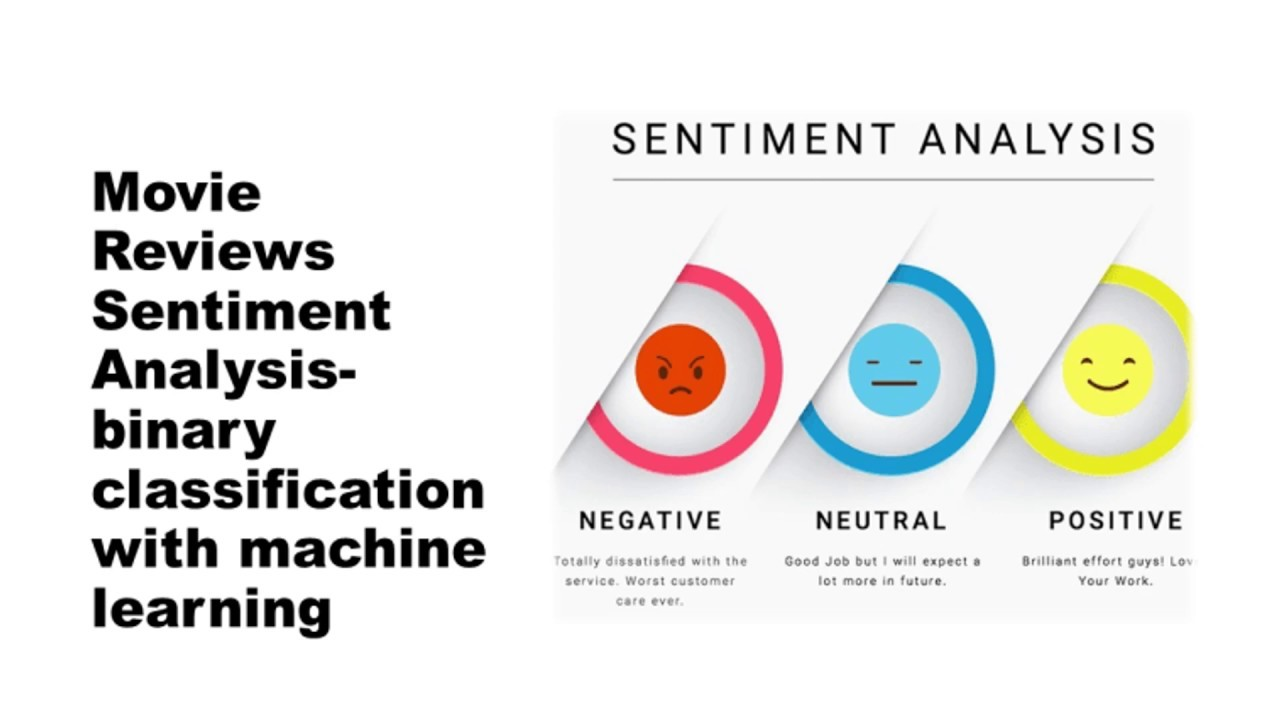

### Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import re
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

### Read & Load Data

In [3]:
train=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\NLP Dataset\\Movie_review\\Movie_Train.csv')
train.head()

,Unnamed: 0,PhraseId,SentenceId,Phrase,Sentiment
0,0,1,1,A series of escapades demonstrating the adage ...,1
1,1,2,1,A series of escapades demonstrating the adage ...,2
2,2,3,1,A series,2
3,3,4,1,A,2
4,4,5,1,series,2


In [4]:
test=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\NLP Dataset\\Movie_review\\Movie_Test.csv')
test.head()

,Unnamed: 0,PhraseId,SentenceId,Phrase
0,0,156061,8545,An intermittently pleasing but mostly routine ...
1,1,156062,8545,An intermittently pleasing but mostly routine ...
2,2,156063,8545,An
3,3,156064,8545,intermittently pleasing but mostly routine effort
4,4,156065,8545,intermittently pleasing but mostly routine


### Understand the data

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'Regular Expression (re package).ipynb',
 'Sentiment Analysis on Flipkart Product Review.ipynb',
 'Sentiment Analysis on Movie Review.ipynb',
 'Text Preprocessing-1.ipynb',
 'Text Preprocessing.ipynb',
 'Untitled.ipynb']

In [5]:
train.shape

(156060, 5)

In [6]:
train.size

780300

In [7]:
test.shape

(66292, 4)

In [8]:
test.size

265168

#### To See the "Phrase" columns entire text Set the column width

In [5]:
pd.set_option('display.max_colwidth',9999)
train.head()

,Unnamed: 0,PhraseId,SentenceId,Phrase,Sentiment
0,0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,2,3,1,A series,2
3,3,4,1,A,2
4,4,5,1,series,2


In [10]:
test.head()

,Unnamed: 0,PhraseId,SentenceId,Phrase
0,0,156061,8545,An intermittently pleasing but mostly routine effort .
1,1,156062,8545,An intermittently pleasing but mostly routine effort
2,2,156063,8545,An
3,3,156064,8545,intermittently pleasing but mostly routine effort
4,4,156065,8545,intermittently pleasing but mostly routine


### What are the different type of Sentiments?

In [7]:
train['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

### Rename the sentiments column values so that anyone can understand.

In [8]:
def sent(x):
    if x>=3:
        return 'positive'
    elif x==2:
        return 'neutral'
    else:
        return 'negative'
    
    
train['Sentiment_class']=train['Sentiment'].apply(sent)
train['Sentiment_class'].value_counts(normalize=True)*100

neutral     50.994489
positive    26.997950
negative    22.007561
Name: Sentiment_class, dtype: float64

- 50% are neutral, 26% are positive & 22% are nnegative Sentiments.

##### Now just see Phrases and Sentiments class

In [9]:
train1=train[['Phrase', 'Sentiment_class']]
train1.head()

,Phrase,Sentiment_class
0,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",negative
1,A series of escapades demonstrating the adage that what is good for the goose,neutral
2,A series,neutral
3,A,neutral
4,series,neutral


### Cleaning the data
* 1. Level 1 Technique:
        * Regex
        * Removal of numbers
        * Removal of symbols
        * Making text in lower case
        * Removing the commonly occurring words
        
* 2. Level 2 Technique: (We actually see the Natural Language Processing taking place as these techniques are highly language based)
        * POS Tagging
        * Stemming
        * Lemmatization
        * Stop words
        * Business Specific Words

#### Stopwords in English

In [10]:
nltk_stopwords=stopwords.words('english')
len(nltk_stopwords)

179

In [8]:
#nltk_stopwords

**Above are the Stopwords in English**

### Adding some more stopwords

In [11]:
my_stopwords=['i see','you know', 'none', 'also', 'would','would not','some']
final_stop_words=nltk_stopwords+my_stopwords
len(final_stop_words)

186

- Now the total stopwords are 186.

### Defining a function which replace some words

In [12]:
def decontract(text):
    text=re.sub(r"won\'t","will not", text)
    text=re.sub(r"can\'t","can not", text)
    text=re.sub(r"n\'t", "not", text)
    text=re.sub(r"\'re", "are", text)
    text=re.sub(r"\'s", "is", text)
    text=re.sub(r"\'d", "would", text)
    text=re.sub(r"\'ll", "will", text)
    text=re.sub(r"\'t", "not", text)
    text=re.sub(r"\'ve", "have", text)
    text=re.sub(r"\'m", "am", text)    
    return text

**Lets test the function**

In [13]:
tt="I won't take it personality" 
re.sub(r"won\'t", "will not", tt)

'I will not take it personality'

### Creating Lemma

In [14]:
lem=WordNetLemmatizer()

### Defining Function that removes some unwanted text & symbols

In [15]:
def preprocess_text(text):
    text = re.sub(r"http\S+", "", text)             # removing website links
    text = BeautifulSoup(text, 'lxml').get_text()   # removing html tags
    text = decontract(text)                         # decontracting
    text = re.sub("\S*\d\S*", "", text).strip()     # removing the words with numeric digits
    text = re.sub('[^A-Za-z]+', ' ', text)          # removing non-word characters
    text = text.lower()                             # converting to lower case
    text = [word for word in text.split(" ") if not word in final_stop_words] # removing stop words
    text = [lem.lemmatize(token) for token in text] #Lemmatization
    text = " ".join(text)
    text.strip()
    return text

### Apply the Above function to preprocess our Text Data

In [16]:
train1['Phrase1']=train1['Phrase'].apply(lambda x : preprocess_text(x))

In [24]:
train1.columns

Index(['Phrase', 'Sentiment_class', 'Phrase1'], dtype='object')

In [17]:
train1.head()

,Phrase,Sentiment_class,Phrase1
0,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",negative,series escapade demonstrating adage good goose good gander occasionally amuses amount much story
1,A series of escapades demonstrating the adage that what is good for the goose,neutral,series escapade demonstrating adage good goose
2,A series,neutral,series
3,A,neutral,
4,series,neutral,series


### Highlighted Words in Reviews

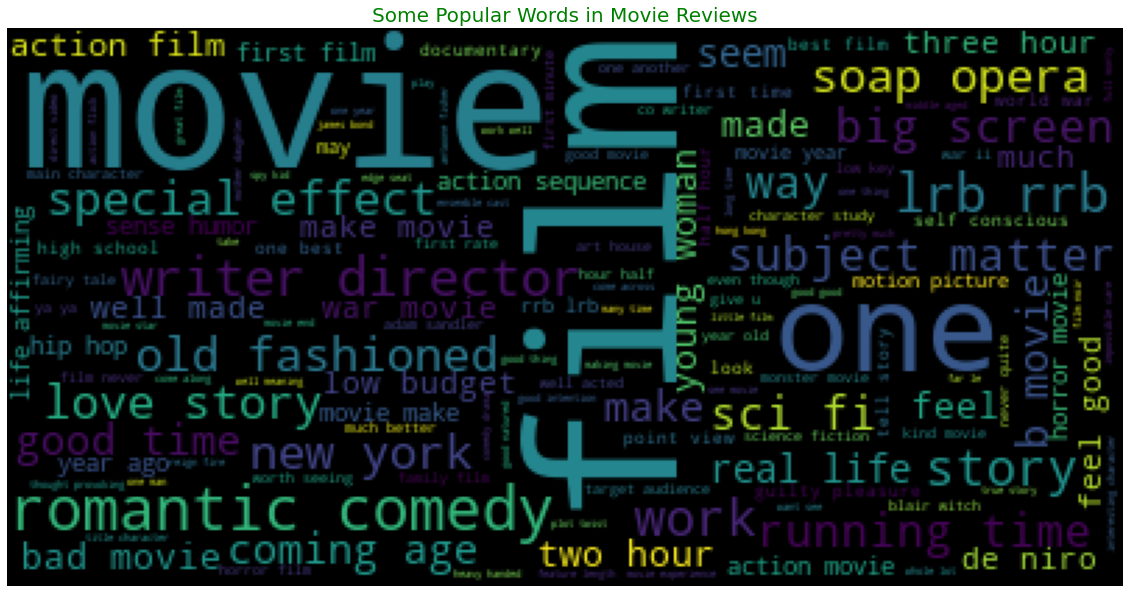

In [19]:
text = " ".join(i for i in train1.Phrase1)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="black").generate(text)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud)
plt.title('Some Popular Words in Movie Reviews', color='green',fontsize=20)
plt.axis("off")
plt.show()

### Display the Words which Represent Positive Sentiment

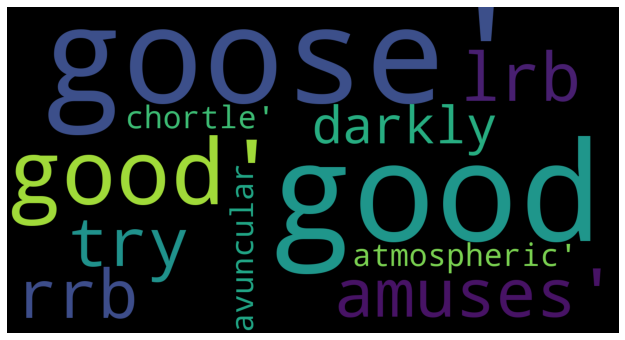

In [28]:
for_graph=train1[train1['Sentiment_class']=='positive']
review=for_graph['Phrase1'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(review))
plt.figure(figsize=(18,6))
plt.imshow(word_cloud)
plt.axis('off');

### Display the Words which Represent Negative Sentiment

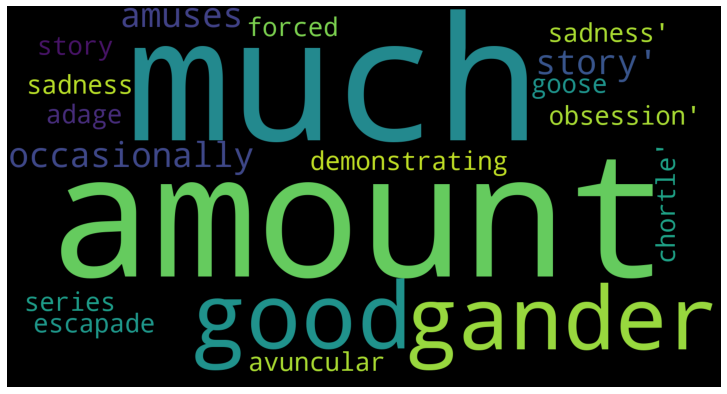

In [29]:
for_graph=train1[train1["Sentiment_class"]=="negative"]
review=for_graph["Phrase1"].values
word_cloud=WordCloud(max_words=500, width=1500, height=800).generate(str(review))
plt.figure(figsize=(15,7))
plt.imshow(word_cloud)
plt.axis("off");

### Display the Words which Represent Neutral Sentiment

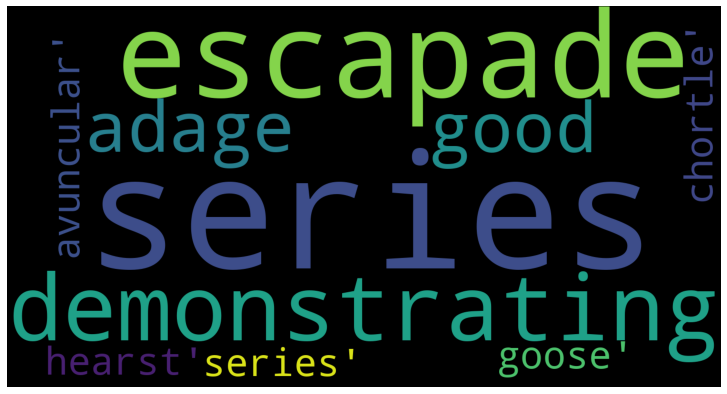

In [30]:
for_graph=train1[train1["Sentiment_class"]=="neutral"]
review=for_graph["Phrase1"].values
word_cloud=WordCloud(max_words=500, width=1500, height=800).generate(str(review))
plt.figure(figsize=(15,7))
plt.imshow(word_cloud)
plt.axis("off");

#### Change Background of graph

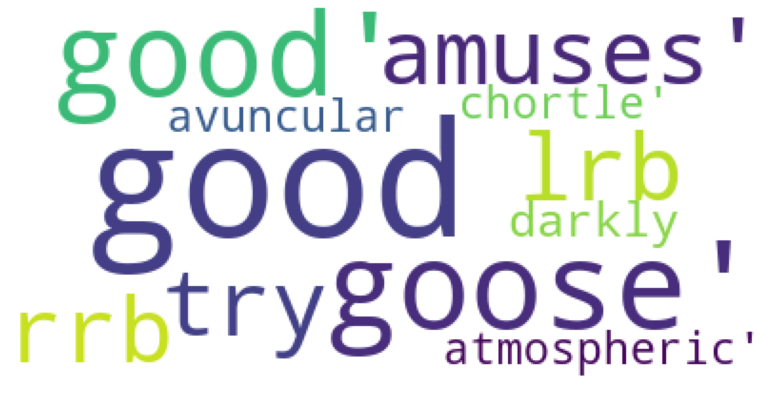

In [32]:
for_graph=train1[train1["Sentiment_class"]=="positive"]
review=for_graph["Phrase1"].values
word_cloud=WordCloud(collocations=False, background_color='white').generate(str(review))
plt.figure(figsize=(15,7))
plt.imshow(word_cloud)
plt.axis("off");

## Model Development

## 1. Using Count Vectorizer

In [20]:
#train1['Sentiment_class'].map({'positive':2, 'negative':1, 'neutral':0})
#train1.head()

,Phrase,Sentiment_class,Phrase1
0,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",negative,series escapade demonstrating adage good goose good gander occasionally amuses amount much story
1,A series of escapades demonstrating the adage that what is good for the goose,neutral,series escapade demonstrating adage good goose
2,A series,neutral,series
3,A,neutral,
4,series,neutral,series


#### Creating x, y variables

In [18]:
x=train1['Phrase1']
y=train1['Sentiment_class']

#### Spliting data

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
#CountVectorizer: It Convert the text data into numerical data

In [20]:
x_train, x_val, y_train, y_val=train_test_split(x,y, test_size=0.3, random_state=0)

#### Convert the text data into numerical data using countvectorizer

In [21]:
cvt=CountVectorizer(lowercase=True, stop_words='english', max_df=0.5,min_df=80, ngram_range=(1, 3))
cvt

CountVectorizer(max_df=0.5, min_df=80, ngram_range=(1, 3), stop_words='english')

#### Fitting countverctorizer

In [22]:
cvt_fitted=cvt.fit(x_train)

In [23]:
len(cvt_fitted.get_feature_names())

914

#### Create DataFrame of Words Generated by countvectorizer

In [24]:
x_train_df=pd.DataFrame(cvt_fitted.transform(x_train).toarray(),columns=cvt_fitted.get_feature_names())

In [25]:
x_train_df.head()

,ability,able,act,acted,acting,action,actor,actress,actually,adam,...,worthy,writer,writer director,writing,written,wrong,year,york,young,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
x_train_df.shape

(109242, 914)

In [ ]:
#cvt_fitted.vocabulary_

In [27]:
x_val_df=pd.DataFrame(cvt_fitted.transform(x_val).toarray(),columns=cvt_fitted.get_feature_names())
x_val_df.head()

,ability,able,act,acted,acting,action,actor,actress,actually,adam,...,worthy,writer,writer director,writing,written,wrong,year,york,young,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_df,y_train)
print("Train Score : ", lr.score(x_train_df, y_train))
print("Val Score : ", lr.score(x_val_df, y_val))

Train Score :  0.6479284524267224
Val Score :  0.6397112221795036


#### Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=15)
dt.fit(x_train_df,y_train)
print("Train Score : ", dt.score(x_train_df, y_train))
print("Val Score : ", dt.score(x_val_df, y_val))

Train Score :  0.5520587319895278
Val Score :  0.5496390277243796


**Score is low**

#### Test the model

In [71]:
comments=[
'''
TORTURE of EPIC proportion, full on nonsense yet hilarious script & screenplay.
Villain Gyaanprakash will make you laugh like mad, best comic actor of 2020. 
Bhatt saab career weakest direction,Why alia did this film only guru gyaanprakash knows. 
Film has no story connection with Sadak-1, just to rake moolah from its brand makers 
forcibly adjusted Ravi kishore angle to the film, which makes it more terrible. Every 
character is shoddily written & performed. Only Sanjay dutt did a fair job, adtiya roy
wasted.If any one out here, even a hardcore alia bhatt fan can watch this film from start
to end, i will salute their mental strength, for me they are superhuman with unparalleled
mental & physical strength.If #Sadak2 had a theatrical release, I guarantee its lifetime 
business would’ve wrapped under 20 crs. Digital release is a blessing in disguise for the
makers, how they managed to sell it to @DisneyPlusHS will be a case study.
''',

'''
I dont believe banning anything without a trial but it was a mistake and waste of time to
see Sadak 2.Its a sadakchhap movie and it was better that Mahesh Bhatt had retired( why 
did he come back,absolutely senile and wondered is it  the same man who gave some memorable
movies in the past!)
This Sadak is like any bumpy road in India with potholes and very uncomfortable to travel,
we miss everything from story,acting to music from original Sadak!
Outdated dialogues,boring screenplay,Alia's screaming, obnoxious Makarand Deshpande,
Sanjay Dutt with bulging,sleepy,wet  eyes,  the cranky Guruji all get on your nerves!
Actually this born dead  movie is not worthy of writing review also or for any anger but
please don't waste your time even protesting this movie,Bhat saab please retire again for
Guruji's sake  and don't give your biased,confused opinions on everything!
''',
'''
It is very good movie .... It's gripping till the end.... an amazing story with shocking
plot twist .... music was well placed with captivating lyrics .... Got to see Gulshan 
Grover Sir and our bengali sweetheart Jisshu Sengupta ...Sanjay Sir and Makarand Sir 
were outstanding and both Alia and Priyanka did an amazing job ...Every actor played 
their part very nicely on point... It is every good for one time watch as venturing 
into something unknown is the actual essence of the movie but it might kill your enthusiasm if you know the story...
'''
]
dd=pd.DataFrame(comments, columns=['comment'])
dd['comm1']=dd['comment'].apply(lambda x : preprocess_text(x))
dd1=cvt_fitted.transform(dd['comm1'])
lr.predict(dd1)

array(['positive', 'negative', 'positive'], dtype=object)

## 2. TF-IDF Vectorizer

In [53]:
x.head()

0    series escapade demonstrating adage good goose good gander occasionally amuses amount much story 
1                                                       series escapade demonstrating adage good goose
2                                                                                               series
3                                                                                                     
4                                                                                               series
Name: Phrase1, dtype: object

In [54]:
y.head()

0    negative
1     neutral
2     neutral
3     neutral
4     neutral
Name: Sentiment_class, dtype: object

#### TrainTest Split

In [72]:
x_train, x_val, y_train, y_val=train_test_split(x,y, test_size=0.3, random_state=0)

#### Convert Text data to Numeric using TD-IDF vectorzer

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
tf_fitted=tf.fit(x_train)
x_train_tf=tf_fitted.transform(x_train)
x_val_tf=tf_fitted.transform(x_val)

In [57]:
x_train_tf.shape

(109242, 13572)

In [58]:
x_val_tf.shape

(46818, 13572)

#### Create Classification Models and see the Prediction Accuracy

#### Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_tf,y_train)
print("Train Score : ", lr.score(x_train_tf, y_train))
print("Val Score : ", lr.score(x_val_tf, y_val))

Train Score :  0.7598908844583585
Val Score :  0.7189115297535136


#### Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train_tf,y_train)
print("Train Score : ", dt.score(x_train_tf, y_train))
print("Val Score : ", dt.score(x_val_tf, y_val))

Train Score :  0.9064828545797404
Val Score :  0.7071639113161604


#### Testing the Model

In [76]:
comments=[
'''
TORTURE of EPIC proportion, full on nonsense yet hilarious script & screenplay.
Villain Gyaanprakash will make you laugh like mad, best comic actor of 2020. 
Bhatt saab career weakest direction,Why alia did this film only guru gyaanprakash knows. 
Film has no story connection with Sadak-1, just to rake moolah from its brand makers 
forcibly adjusted Ravi kishore angle to the film, which makes it more terrible. Every 
character is shoddily written & performed. Only Sanjay dutt did a fair job, adtiya roy
wasted.If any one out here, even a hardcore alia bhatt fan can watch this film from start
to end, i will salute their mental strength, for me they are superhuman with unparalleled
mental & physical strength.If #Sadak2 had a theatrical release, I guarantee its lifetime 
business would’ve wrapped under 20 crs. Digital release is a blessing in disguise for the
makers, how they managed to sell it to @DisneyPlusHS will be a case study.
''',

'''
I dont believe banning anything without a trial but it was a mistake and waste of time to
see Sadak 2.Its a sadakchhap movie and it was better that Mahesh Bhatt had retired( why 
did he come back,absolutely senile and wondered is it  the same man who gave some memorable
movies in the past!)
This Sadak is like any bumpy road in India with potholes and very uncomfortable to travel,
we miss everything from story,acting to music from original Sadak!
Outdated dialogues,boring screenplay,Alia's screaming, obnoxious Makarand Deshpande,
Sanjay Dutt with bulging,sleepy,wet  eyes,  the cranky Guruji all get on your nerves!
Actually this born dead  movie is not worthy of writing review also or for any anger but
please don't waste your time even protesting this movie,Bhat saab please retire again for
Guruji's sake  and don't give your biased,confused opinions on everything!
''',
'''
It is very good movie .... It's gripping till the end.... an amazing story with shocking
plot twist .... music was well placed with captivating lyrics .... Got to see Gulshan 
Grover Sir and our bengali sweetheart Jisshu Sengupta ...Sanjay Sir and Makarand Sir 
were outstanding and both Alia and Priyanka did an amazing job ...Every actor played 
their part very nicely on point... It is every good for one time watch as venturing 
into something unknown is the actual essence of the movie but it might kill your enthusiasm if you know the story...
'''
]

dd=pd.DataFrame(comments, columns=['comment'])
dd['comm1']=dd['comment'].apply(lambda x : preprocess_text(x))
dd1=tf_fitted.transform(dd['comm1'])
lr.predict(dd1)

array(['positive', 'negative', 'positive'], dtype=object)